In [25]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
df = pd.read_csv('./netflix_titles.csv', encoding='UTF-8')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# TRATAMENTO DOS DADOS NULOS

In [33]:
df_clean = df.fillna({'director': 'na', 'cast': 'na', 'country': 'na', 'date_added': 'na', 'rating': 'na'})

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      6234 non-null   object
 4   cast          6234 non-null   object
 5   country       6234 non-null   object
 6   date_added    6234 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [35]:
df_clean.sample(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
531,81078456,Movie,It Takes a Lunatic,Billy Lyons,na,"United States, United Kingdom, Germany","October 25, 2019",2019,TV-MA,127 min,Documentaries,The extraordinary life of beloved acting teach...
1607,70025612,Movie,Krishna Cottage,Santram Varma,"Sohail Khan, Isha Koppikar, Natasha, Rati Agni...",India,"May 31, 2019",2004,TV-MA,124 min,"Action & Adventure, Horror Movies, Internation...",True love is put to the test when another woma...
4876,80185322,Movie,Lynne Koplitz: Hormonal Beast,Marcus Raboy,Lynne Koplitz,United States,"August 22, 2017",2017,TV-MA,51 min,Stand-Up Comedy,Unabashed comedian Lynne Koplitz offers a woma...
1836,80150390,Movie,Abhinetri,A. L. Vijay,"Tamannaah Bhatia, Prabhu Deva, Sonu Sood, Sapt...",India,"May 1, 2018",2016,TV-14,131 min,"Comedies, International Movies, Sci-Fi & Fantasy","Due to family pressure, a corporate man reluct..."
2528,80133553,Movie,Chris D'Elia: Man on Fire,Bill D'Elia,Chris D'Elia,United States,"June 27, 2017",2017,TV-MA,66 min,Stand-Up Comedy,Unbridled comic Chris D'Elia reconsiders his a...
1875,80990813,Movie,Waiting,Anu Menon,"Naseeruddin Shah, Kalki Koechlin, Rajat Kapoor...",India,"May 1, 2018",2015,TV-14,94 min,"Dramas, International Movies",While visiting his comatose wife in the hospit...
2068,81049479,TV Show,The Eagle of El-Se'eed,na,"Mohamed Ramadan, Sayed Rajab, Dorra Zarrouk, D...",na,"March 25, 2019",2018,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Act...",A police officer and a drug lord become embroi...
5030,81135868,Movie,Woodstock,Barak Goodman,na,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...
3151,80157457,TV Show,Mystic Whispers,na,"Romeo Tan, Sheila Sim, Yuan Shuai, Aloysius Pang",na,"July 1, 2017",2014,TV-14,1 Season,"International TV Shows, TV Dramas, TV Horror",After a car accident enables a young woman to ...
5198,80096984,Movie,Amateur,Ryan Koo,"Michael Rainey Jr., Josh Charles, Brian White,...",United States,"April 6, 2018",2018,TV-MA,96 min,"Dramas, Independent Movies, Sports Movies","After he's recruited to an elite prep school, ..."


In [43]:
df_clean.type.value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [40]:
movies = df_clean[df_clean.type == 'Movie'].shape[0]
tvshows = df_clean[df_clean.type == 'TV Show'].shape[0]

## TWO TYPES OF MEDIAS

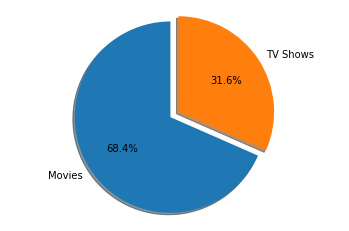

In [41]:
# PIE CHART
labels = 'Movies', 'TV Shows'
sizes = [movies, tvshows]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()